In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
from datetime import datetime
import math
import itertools 

import scipy.stats as st
import statsmodels

from sklearn.preprocessing import PowerTransformer
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as MAE
from sklearn import linear_model

import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import json
sys.path.insert(1, '../')
import lib.pe_down_loading_data_frame as loader
import lib.pe_utils as utils
import lib.la_model as model
import lib.pe_model as pe_model
import lib.pe_config as conf
import lib.pe_df_analyzer as analyzer
import lib.pe_varmaker as va_m
import lib.pe_df_writer as writer
import lib.pe_metrics as metrics
import lib.pe_preprocessing as prepro
import lib.la_prepro as la_prepro
import lib.la_utils as la_utils
import imp
imp.reload(la_utils)
imp.reload(loader)
imp.reload(utils)
imp.reload(model)
imp.reload(pe_model)
imp.reload(conf)
imp.reload(analyzer)
imp.reload(va_m)
imp.reload(writer)
imp.reload(metrics)
imp.reload(prepro)
imp.reload(la_prepro)
load_model_data = utils.load_model_data
load_var_data  = utils.load_var_data

In [2]:
step = '1m'
dots=5
dc_period = {'us6-acs2': ['14/01/2020 00:01', '18/05/2020 23:45'],
             'au2-acs1': ['14/01/2020 00:01', '18/05/2020 23:45'],
             'eu3-acs1': ['14/01/2020 00:01', '18/05/2020 23:45'],
             'us3':      ['14/01/2020 00:01', '18/05/2020 23:45'],
            }
for dc in dc_period:
    for inst_num in conf.get_inst_range_for_dc(dc):
        start_time = dc_period[dc][0]
        end_time = dc_period[dc][1]
        
        load_model_data(dc, inst_num, start_time, end_time, dots)
        load_var_data(dc, inst_num, start_time, end_time, dots)


model:
DC=us6-acs2
INSTANCE=1
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=1
	var data already loaded

model:
DC=us6-acs2
INSTANCE=2
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=2
	var data already loaded

model:
DC=us6-acs2
INSTANCE=3
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=3
	var data already loaded

model:
DC=us6-acs2
INSTANCE=4
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=4
	var data already loaded

model:
DC=us6-acs2
INSTANCE=5
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=5
	var data already loaded

model:
DC=us6-acs2
INSTANCE=6
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=6
	var data already loaded

model:
DC=us6-acs2
INSTANCE=7
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=7
	var data already loaded

model:
DC=us6-acs2
INSTANCE=8
	data for model is already loaded

var:
DC=us6-acs2
INSTANCE=8
	var data already loaded

model:
DC=us6-acs2
INSTANCE=9
	data for model i

In [3]:
dc = 'us6-acs2'
inst_n = 1
data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
data = la_prepro.fill_misses(data)

# Test-train кривая

In [4]:
sizes = np.logspace(np.log(300) / np.log(10),
                    np.log(60 * 24 * 7 * 3) / np.log(10),
                    num=100, dtype=int)
'''
test_size = 60 * 24 * 7 * 2
test_data = data[max(sizes):max(sizes) + test_size].copy()
errors_train = []
errors_test = []
for train_size in sizes:
    train_data = data.copy()
    train_data = train_data[:train_size]
    print(f'train_size={train_data.shape[0]}')
    print(f'{sizes.tolist().index(train_size)+1}/{len(sizes)}')
    

    predictor = pe_model.Model1_Scaled_Derive(dots=1, n_sigma_outliers=np.inf)
    predictor.fit(train_data)
    # and prepare data to save
    out = predictor.predict(train_data)
    out.dropna(inplace=True)
    y_hat = predictor.scaler_y.inverse_transform(out['predictions_sc'].values.reshape((-1, 1)))
    y = predictor.scaler_y.inverse_transform(out['target_der_sc'].values.reshape((-1, 1)))
    errors_train.append(MAE(y, y_hat))
    
    out = predictor.predict(test_data)
    out.dropna(inplace=True)
    
    y_hat = predictor.scaler_y.inverse_transform(out['predictions_sc'].values.reshape((-1, 1)))
    y = predictor.scaler_y.inverse_transform(out['target_der_sc'].values.reshape((-1, 1)))
    
    errors_test.append(MAE(y, y_hat))

_d = pd.DataFrame()
_d['errors_test'] = errors_test
_d['errors_train'] = errors_train
_d['sizes'] = sizes
_d.to_csv('../datasets/Aleksander/mse_test-train.csv')
'''

"\ntest_size = 60 * 24 * 7 * 2\ntest_data = data[max(sizes):max(sizes) + test_size].copy()\nerrors_train = []\nerrors_test = []\nfor train_size in sizes:\n    train_data = data.copy()\n    train_data = train_data[:train_size]\n    print(f'train_size={train_data.shape[0]}')\n    print(f'{sizes.tolist().index(train_size)+1}/{len(sizes)}')\n    \n\n    predictor = pe_model.Model1_Scaled_Derive(dots=1, n_sigma_outliers=np.inf)\n    predictor.fit(train_data)\n    # and prepare data to save\n    out = predictor.predict(train_data)\n    out.dropna(inplace=True)\n    y_hat = predictor.scaler_y.inverse_transform(out['predictions_sc'].values.reshape((-1, 1)))\n    y = predictor.scaler_y.inverse_transform(out['target_der_sc'].values.reshape((-1, 1)))\n    errors_train.append(MAE(y, y_hat))\n    \n    out = predictor.predict(test_data)\n    out.dropna(inplace=True)\n    \n    y_hat = predictor.scaler_y.inverse_transform(out['predictions_sc'].values.reshape((-1, 1)))\n    y = predictor.scaler_y.inv

# Test-Train кривая
Но для HubertLoss

In [5]:
'''
test_data = data[max(sizes):max(sizes) + test_size].copy()
droped_outliers = []
errors_train = []
errors_test = []
for train_size in sizes:
    train_data = data.copy()
    train_data = train_data[:train_size]
    print(f'train_size={train_data.shape[0]}')
    print(f'{sizes.tolist().index(train_size)+1}/{len(sizes)}')
    
    # reloads_ts = train_data[train_data['target'].diff() < 0]['time_stamp'].values
    # train_data = analyzer.get_df_with_droped_reloads(train_data, reloads_ts, reload_window=60 * 10)
    

    predictor = pe_model.Model1_Scaled_Derive(estimator=linear_model.HuberRegressor(),
                                           dots=1, n_sigma_outliers=np.inf)
    predictor.fit(train_data)
    # and prepare data to save
    out = predictor.predict(train_data)
    out.dropna(inplace=True)
    y_hat = predictor.scaler_y.inverse_transform(out['predictions_sc'].values.reshape((-1, 1)))
    y = predictor.scaler_y.inverse_transform(out['target_der_sc'].values.reshape((-1, 1)))
    errors_train.append(MAE(y, y_hat))
    droped_outliers.append(train_size - (out.shape[0] + dots - 1))
    
    out = predictor.predict(test_data)
    out.dropna(inplace=True)
    
    y_hat = predictor.scaler_y.inverse_transform(out['predictions_sc'].values.reshape((-1, 1)))
    y = predictor.scaler_y.inverse_transform(out['target_der_sc'].values.reshape((-1, 1)))
    
    errors_test.append(MAE(y, y_hat))
_d = pd.DataFrame()
_d['errors_test'] = errors_test
_d['errors_train'] = errors_train
_d['sizes'] = sizes
_d.to_csv('../datasets/Aleksander/hub_test-train.csv')
'''

"\ntest_data = data[max(sizes):max(sizes) + test_size].copy()\ndroped_outliers = []\nerrors_train = []\nerrors_test = []\nfor train_size in sizes:\n    train_data = data.copy()\n    train_data = train_data[:train_size]\n    print(f'train_size={train_data.shape[0]}')\n    print(f'{sizes.tolist().index(train_size)+1}/{len(sizes)}')\n    \n    # reloads_ts = train_data[train_data['target'].diff() < 0]['time_stamp'].values\n    # train_data = analyzer.get_df_with_droped_reloads(train_data, reloads_ts, reload_window=60 * 10)\n    \n\n    predictor = pe_model.Model1_Scaled_Derive(estimator=linear_model.HuberRegressor(),\n                                           dots=1, n_sigma_outliers=np.inf)\n    predictor.fit(train_data)\n    # and prepare data to save\n    out = predictor.predict(train_data)\n    out.dropna(inplace=True)\n    y_hat = predictor.scaler_y.inverse_transform(out['predictions_sc'].values.reshape((-1, 1)))\n    y = predictor.scaler_y.inverse_transform(out['target_der_sc'].val

# Проверяем сколько предыдущих точек нужно учитывать

In [6]:
'''
dots = np.linspace(1, 10, num=10, dtype=int)

train_size = 60 * 24 * 7
test_size = 60 * 24 * 7 * 2
# dots_data = pd.DataFrame()
dots_data = pd.read_csv('../datasets/Aleksander/dots_data.csv')
for dc in dc_period:
    print(f'dc={dc}')
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):

        if f'dc={dc}__inst_n={inst_n}' not in list(dots_data.columns.values):
            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            # data['date'] = data['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))
            data = la_prepro.fill_misses(data)
            maes = []
            for d in dots:
                predictor = pe_model.Model1_Scaled_Derive(estimator=linear_model.HuberRegressor(), 
                                                          dots=d, n_sigma_outliers=np.inf)
                maes.append(metrics.get_validation_score(model=predictor, data=data, 
                                                         train_size=train_size, test_size=test_size
                                                        )
                           )
            dots_data[f'dc={dc}__inst_n={inst_n}'] = maes
            dots_data.to_csv('../datasets/Aleksander/dots_data.csv')
        
        plt.plot(dots, dots_data[f'dc={dc}__inst_n={inst_n}'])
        plt.title(f'dc={dc}__inst_n={inst_n}')
        plt.xlabel('p')
        plt.ylabel('MAE val')
        plt.show()
'''

"\ndots = np.linspace(1, 10, num=10, dtype=int)\n\ntrain_size = 60 * 24 * 7\ntest_size = 60 * 24 * 7 * 2\n# dots_data = pd.DataFrame()\ndots_data = pd.read_csv('../datasets/Aleksander/dots_data.csv')\nfor dc in dc_period:\n    print(f'dc={dc}')\n    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):\n\n        if f'dc={dc}__inst_n={inst_n}' not in list(dots_data.columns.values):\n            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')\n            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))\n            # data['date'] = data['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))\n            data = la_prepro.fill_misses(data)\n            maes = []\n            for d in dots:\n                predictor = pe_model.Model1_Scaled_Derive(estimator=linear_model.HuberRegressor(), \n                                                          dots=d, n_sigma_outliers=np.inf)\n                

# Feature importance
## L1
Для начала перебёрём alpha, затем посмотрим на метрики. Всё и сразу записывать - оч жирно. Лучше побольше alpha перебрать чтобы вывод нормал построить.

In [7]:
dots = np.linspace(1, 10, num=10, dtype=int)

train_size = 60 * 24 * 7
test_size = 60 * 24 * 7 * 2
alphas_l1 = np.logspace(np.log(1e-7) / np.log(10),
                    np.log(1e-1) / np.log(10),
                    num=100, dtype=float)
save_freq = 3

In [8]:
'''
coeff_df_l1 = pd.read_csv('../datasets/Aleksander/feature_importance.csv')
# coeff_df_l1 = pd.DataFrame()
coeff_df_l1['alphas'] = alphas_l1
for dc in dc_period:
    print(f'dc={dc}')
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):
        if f'num_dc={dc}__inst_n={inst_n}' not in list(coeff_df_l1.columns.values):
            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            data = la_prepro.fill_misses(data)
            data = data[24 * 7 * 60:]
            maes = []
            nums = []
            for _j, a in enumerate(alphas_l1):
                print(f'\talpha = {_j+1} / {len(alphas_l1)}', end = '\r')
                predictor = model.ModelLA(estimator=linear_model.Lasso(alpha=a), dots=2)
                vs = metrics.get_val_score_and_num(model=predictor, data=data,
                                                   train_size=train_size, 
                                                   test_size=test_size, n=4)
                maes.append(vs[0])
                nums.append(vs[1])

            coeff_df_l1[f'mae_dc={dc}__inst_n={inst_n}'] = maes
            coeff_df_l1[f'num_dc={dc}__inst_n={inst_n}'] = nums
            if _i % save_freq == 0:
                coeff_df_l1.to_csv('../datasets/Aleksander/feature_importance.csv', index=False)
        
        plt.plot(coeff_df_l1['alphas'],
                 coeff_df_l1[f'mae_dc={dc}__inst_n={inst_n}']
                )
        plt.title(f'MAE dc={dc}__inst_n={inst_n}')
        plt.xlabel('alpha')
        plt.ylabel('MAE val')
        plt.xscale('log')
        plt.show()
        
        plt.plot(coeff_df_l1[f'num_dc={dc}__inst_n={inst_n}'],
                 coeff_df_l1[f'mae_dc={dc}__inst_n={inst_n}']
                 )
        plt.title(f'MAE depends on num of coefs \ndc={dc}__inst_n={inst_n}')
        plt.xlabel('num_non_zero_coeffs')
        plt.ylabel('Validation MAE')
        plt.xscale('log')
        plt.show()
coeff_df_l1.to_csv('../datasets/Aleksander/feature_importance.csv', index=False)
'''

"\ncoeff_df_l1 = pd.read_csv('../datasets/Aleksander/feature_importance.csv')\n# coeff_df_l1 = pd.DataFrame()\ncoeff_df_l1['alphas'] = alphas_l1\nfor dc in dc_period:\n    print(f'dc={dc}')\n    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):\n        if f'num_dc={dc}__inst_n={inst_n}' not in list(coeff_df_l1.columns.values):\n            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')\n            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))\n            data = la_prepro.fill_misses(data)\n            data = data[24 * 7 * 60:]\n            maes = []\n            nums = []\n            for _j, a in enumerate(alphas_l1):\n                print(f'\talpha = {_j+1} / {len(alphas_l1)}', end = '\r')\n                predictor = model.ModelLA(estimator=linear_model.Lasso(alpha=a), dots=2)\n                vs = metrics.get_val_score_and_num(model=predictor, data=data,\n                         

Тут мы уже фиксируем число признаков, которое должна оставить $L_1$ и подбираем $\alpha$. 
И записываем коэффициент при этих ненулевых признаках

In [9]:
coeff_df_l1 = pd.read_csv('../datasets/Aleksander/feature_importance.csv')
# coeff_imp_l1 = pd.DataFrame()

des_sc = 6
'''
for dc in dc_period:
    print(f'dc={dc}')
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):
        if 'dc={dc}__inst={inst_n}' not in list(coeff_imp_l1.columns.values):
            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')
            # alpha
            num_n = f'num_dc={dc}__inst_n={inst_n}'
            d_ = coeff_df_l1[['alphas', num_n]]
            a = la_utils.get_alpha(df=d_, score_col=num_n, alpha_col='alphas', desireble_score=des_sc)
            # then data for training
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            data = la_prepro.fill_misses(data)
            # model
            predictor = model.ModelLA(dots=2, estimator=linear_model.Lasso(alpha=a, random_state=42))
            predictor.fit(data[:train_size])
            coeff_imp_l1[f'dc={dc}__inst={inst_n}'] = predictor.est.coef_
features = predictor.features
features_rb = [la_utils.reformat_feature_name(x) for x in features]
coeff_imp_l1[f'features'] = features_rb
coeff_imp_l1.to_csv('../datasets/Aleksander/feature_importance_coeffs.csv', index=False)
'''

"\nfor dc in dc_period:\n    print(f'dc={dc}')\n    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):\n        if 'dc={dc}__inst={inst_n}' not in list(coeff_imp_l1.columns.values):\n            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')\n            # alpha\n            num_n = f'num_dc={dc}__inst_n={inst_n}'\n            d_ = coeff_df_l1[['alphas', num_n]]\n            a = la_utils.get_alpha(df=d_, score_col=num_n, alpha_col='alphas', desireble_score=des_sc)\n            # then data for training\n            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))\n            data = la_prepro.fill_misses(data)\n            # model\n            predictor = model.ModelLA(dots=2, estimator=linear_model.Lasso(alpha=a, random_state=42))\n            predictor.fit(data[:train_size])\n            coeff_imp_l1[f'dc={dc}__inst={inst_n}'] = predictor.est.coef_\nfeatures = predictor.features\nfeatures_rb

У нас есть 100 разных значений котоыре принимают коэффициенты.
Давайте просто попробуем выбрать самые значимые, смотря уже на кучу значений.

В качестве значимости предлагается использовать .mean() +- .std() - самую большую по модулю границу "доверительного интервала".

In [10]:
'''
coeff_imp_l1 = pd.read_csv('../datasets/Aleksander/feature_importance_coeffs.csv')
coeff_imp_l1 = coeff_imp_l1.set_index('features')

var_df = pd.DataFrame()
for _i, feat in enumerate(set(coeff_imp_l1.index.values)):
    x = coeff_imp_l1.loc[feat , :].values.reshape(-1)
    s = x.std()
    m = x.mean()
    g_b = np.abs(m) + s
    var_df[feat] = [s, m, g_b]
    
var_df.index = ['var', 'mean', 'grater_bound']
var_df = var_df.T
var_df.sort_values(by=['grater_bound'], inplace=True, ascending=False)
var_df['feature'] = var_df.index
var_df.reset_index(drop=True, inplace=True)
var_df.to_csv('../datasets/Aleksander/variance_of_feature_coeffs.csv', index=False)
var_df[:15]
'''

"\ncoeff_imp_l1 = pd.read_csv('../datasets/Aleksander/feature_importance_coeffs.csv')\ncoeff_imp_l1 = coeff_imp_l1.set_index('features')\n\nvar_df = pd.DataFrame()\nfor _i, feat in enumerate(set(coeff_imp_l1.index.values)):\n    x = coeff_imp_l1.loc[feat , :].values.reshape(-1)\n    s = x.std()\n    m = x.mean()\n    g_b = np.abs(m) + s\n    var_df[feat] = [s, m, g_b]\n    \nvar_df.index = ['var', 'mean', 'grater_bound']\nvar_df = var_df.T\nvar_df.sort_values(by=['grater_bound'], inplace=True, ascending=False)\nvar_df['feature'] = var_df.index\nvar_df.reset_index(drop=True, inplace=True)\nvar_df.to_csv('../datasets/Aleksander/variance_of_feature_coeffs.csv', index=False)\nvar_df[:15]\n"

До этого у нас была $L_1$ регрессор, мы отбирали не метрики, а признаки.
Сейчас, используя общий набор метрик, проверим, что происходит с моделью.
Сравниваем с результатом, полученым исопльзуя все метрики.

In [11]:
'''
real_features = la_utils.get_imp_values(-1)


dcs_n = len(list(dc_period.keys()))
inst_max_n = 0
for dc in dc_period:
    inst_max_n = max(inst_max_n, max(conf.get_inst_range_for_dc(dc)))
total_data = None
numbs_of_feat = list(range(3, 15))

# firstly let's get df with val scores for all metrics model
test_size = 60 * 24 * 7 * 2
train_size = 60 * 24 * 7

score_on_all_metrics_df = pd.DataFrame(np.zeros((dcs_n, inst_max_n)),
                                   index = list(dc_period.keys()),
                                   columns = [f'all_metrics__{i}' for i in range(1,inst_max_n+1)]
                                  )
print(f'Firstly lets calculate scores for all metrics')
for dc in dc_period:
    print(f'dc={dc}')
    all_metr_scs = {}
    for _i, inst_n in enumerate(conf.get_inst_range_for_dc(dc)):
        print(f'\tinst {_i} / {len(conf.get_inst_range_for_dc(dc))}', end='\r')
        # load data and rename columns
        data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
        data = la_prepro.fill_misses(data)
        data = data[24 * 7 * 60 * 2:]
            
        #Then let's train 2 models with important features and not
        predictor_all = model.ModelLA(imp_features=None)
        all_metr_sc = metrics.get_validation_score(model=predictor_all, data=data, test_size=test_size,
                                                   train_size=train_size, error_func=MAE, n=4
                                                  )
        all_metr_scs[f'all_metrics__{inst_n}'] = all_metr_sc
    score_on_all_metrics_df.loc[dc] = all_metr_scs
# global df for all the num of metrics
all_the_num_metrics_df = None

print(f'Tehn for all metrics')    

print(f'Tehn for all metrics')
range_of_nm = list(range(2, len(real_features)))
# let's calculate scores for all 
for nf in range_of_nm:
    print(f'Number of important metrics = {nf-1}')
    important_features = real_features[1:nf]
    # df for only current num of metrics
    for_curr_num_of_m = pd.DataFrame(np.zeros((dcs_n, inst_max_n)),
                                     index = list(dc_period.keys()),
                                     columns = [f'{nf-1}_metrics__{_i}' for _i in range(1,inst_max_n+1)]
                                    )
    for dc in dc_period:
        print(f'dc={dc}')
        not_all_m_sc = {}
        for _i, inst_n in enumerate(conf.get_inst_range_for_dc(dc)):
            print(f'\tinst {_i} / {len(conf.get_inst_range_for_dc(dc))}', end='\r')
            # load data and rename columns
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            data = la_prepro.fill_misses(data)
            data = data[24 * 7 * 60 * 2:]
            
            #Then let's train 2 models with important features and not
            predictor_imp = model.ModelLA(imp_features=important_features)
            sc = metrics.get_validation_score(model=predictor_imp, data=data, test_size=test_size,
                                              train_size=train_size, error_func=MAE, n=4
                                             )
            not_all_m_sc[f'{nf-1}_metrics__{inst_n}'] = sc
        for_curr_num_of_m.loc[dc] = not_all_m_sc
    if all_the_num_metrics_df is not None:
        all_the_num_metrics_df = pd.concat([all_the_num_metrics_df, for_curr_num_of_m], axis=1)
    else:
        all_the_num_metrics_df = for_curr_num_of_m

    # ok, here are improvement for scores
    cols = for_curr_num_of_m.columns
    indxx = for_curr_num_of_m.index
    before_v = score_on_all_metrics_df.values
    after_v = for_curr_num_of_m.values
    improve = np.divide(before_v - after_v, before_v)
    improve_hm = pd.DataFrame(improve,
                              index=indxx,
                              columns=cols
                             )
    fig, ax = plt.subplots(figsize=(20,15))
    title = f'Improvement after leaving only important features\nNumber of metrics = {len(important_features)}'
    sns.heatmap(improve_hm, cmap="YlGnBu", linewidths=1 ,annot=True,
                linecolor = 'gray', ax = ax, fmt = '.2f'
               ).set_title(title)
    plt.show()

out = pd.concat([all_the_num_metrics_df, score_on_all_metrics_df], axis=1)

out.to_csv(f'../datasets/Aleksander/res_of_drop_metrics.csv')
'''

'\nreal_features = la_utils.get_imp_values(-1)\n\n\ndcs_n = len(list(dc_period.keys()))\ninst_max_n = 0\nfor dc in dc_period:\n    inst_max_n = max(inst_max_n, max(conf.get_inst_range_for_dc(dc)))\ntotal_data = None\nnumbs_of_feat = list(range(3, 15))\n\n# firstly let\'s get df with val scores for all metrics model\ntest_size = 60 * 24 * 7 * 2\ntrain_size = 60 * 24 * 7\n\nscore_on_all_metrics_df = pd.DataFrame(np.zeros((dcs_n, inst_max_n)),\n                                   index = list(dc_period.keys()),\n                                   columns = [f\'all_metrics__{i}\' for i in range(1,inst_max_n+1)]\n                                  )\nprint(f\'Firstly lets calculate scores for all metrics\')\nfor dc in dc_period:\n    print(f\'dc={dc}\')\n    all_metr_scs = {}\n    for _i, inst_n in enumerate(conf.get_inst_range_for_dc(dc)):\n        print(f\'\tinst {_i} / {len(conf.get_inst_range_for_dc(dc))}\', end=\'\r\')\n        # load data and rename columns\n        data = pd.read_csv(l

Ещё раз подбираем dots

dc=us6-acs2


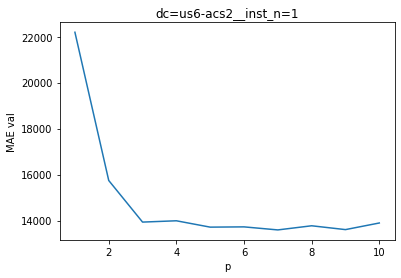

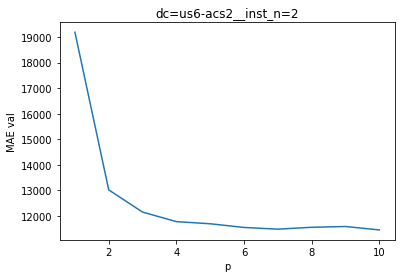

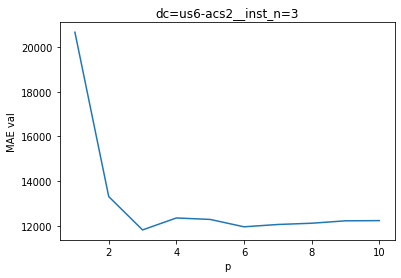

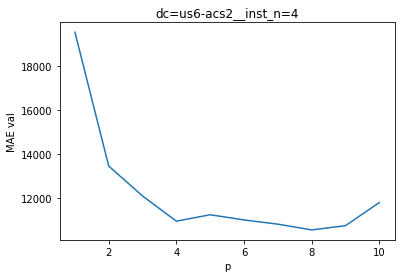

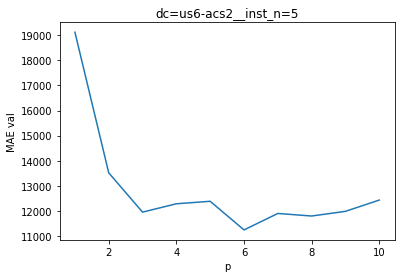

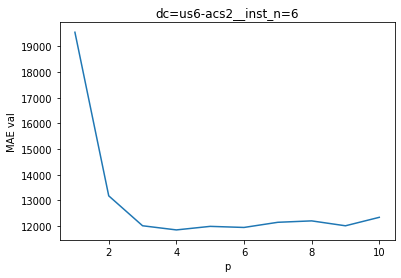

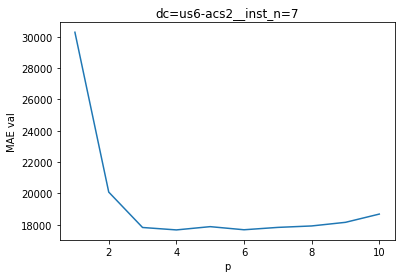

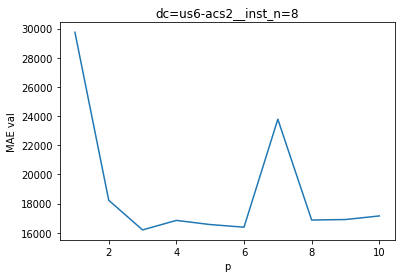

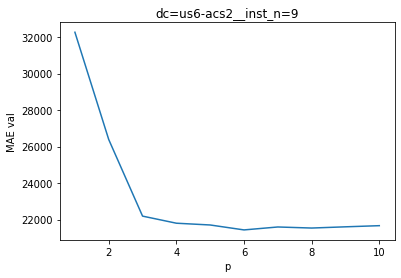

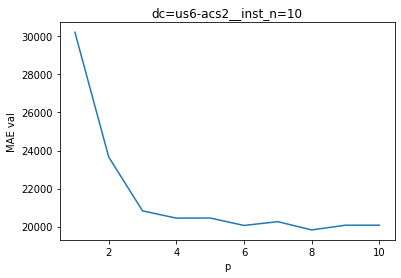

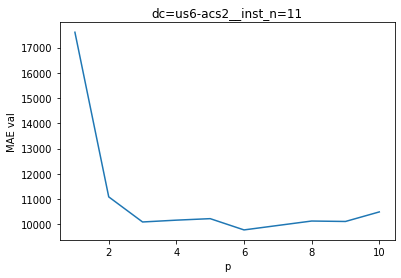

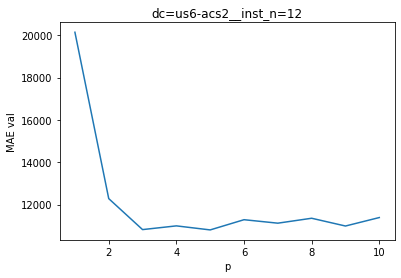

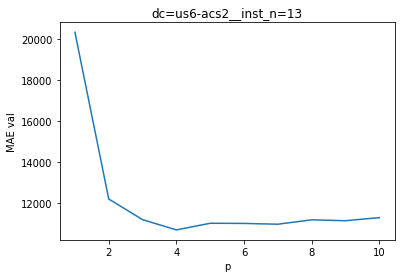

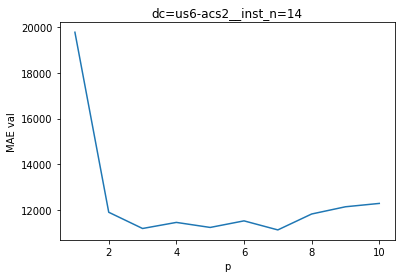

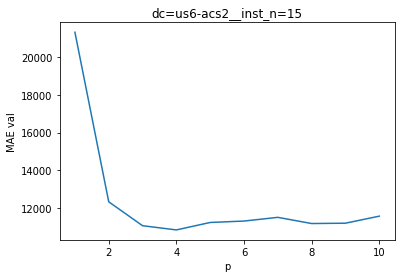

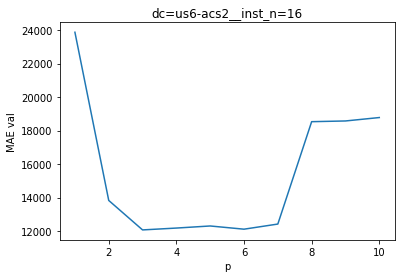

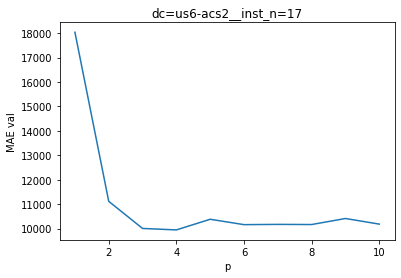

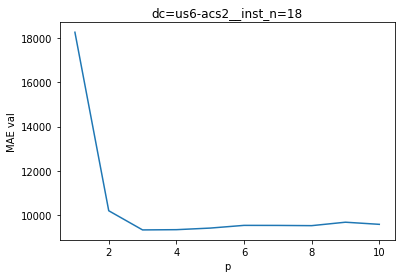

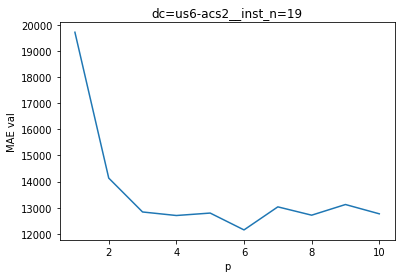

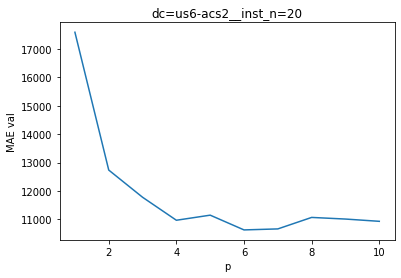

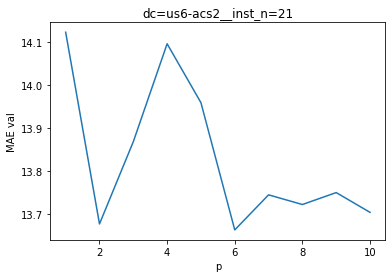

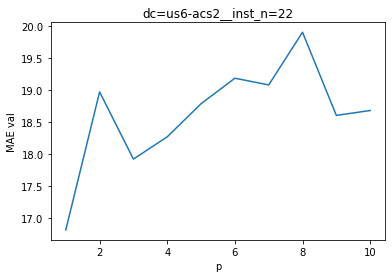

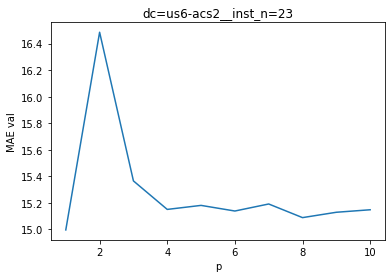

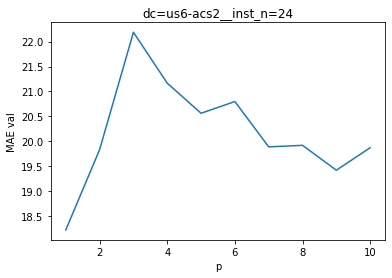

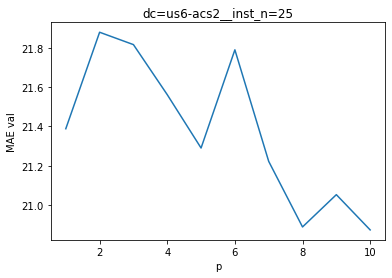

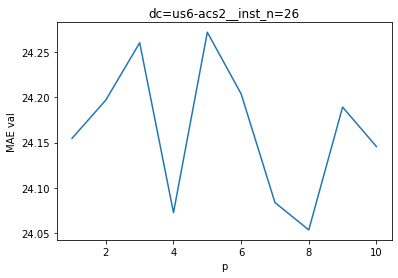

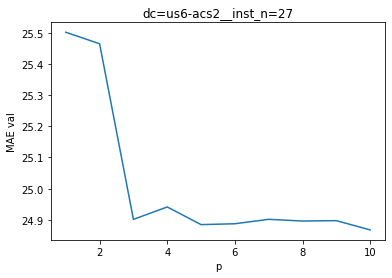

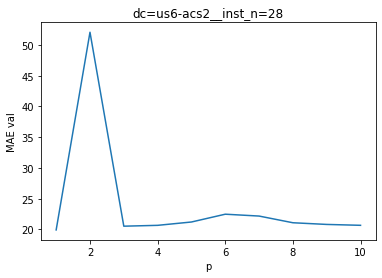

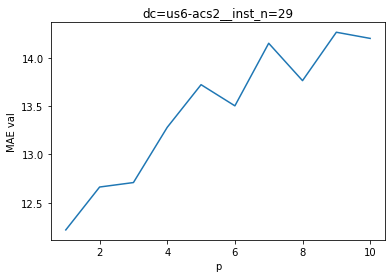

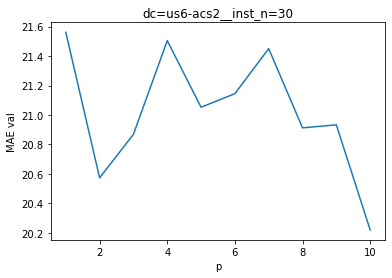

dc=au2-acs1


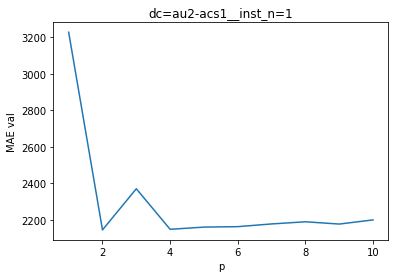

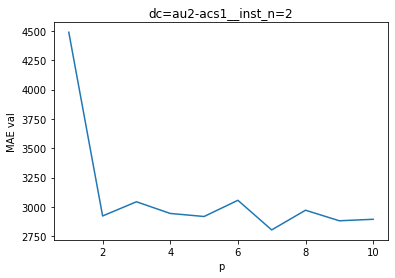

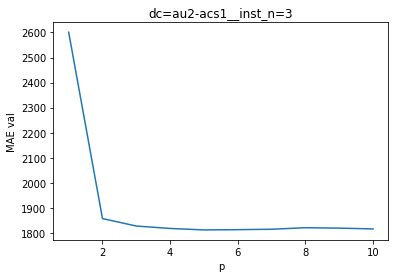

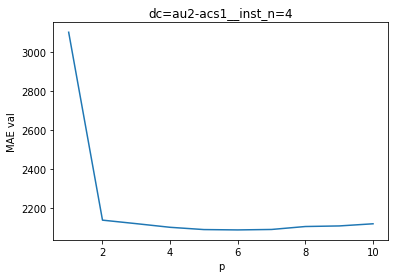

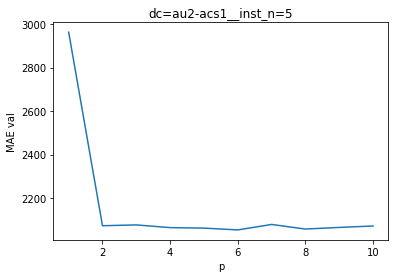

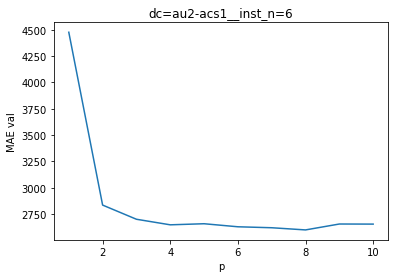

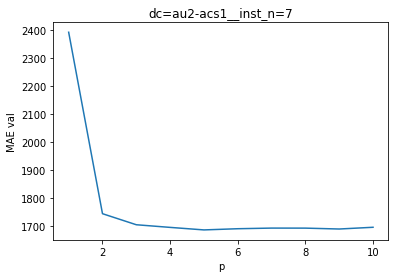

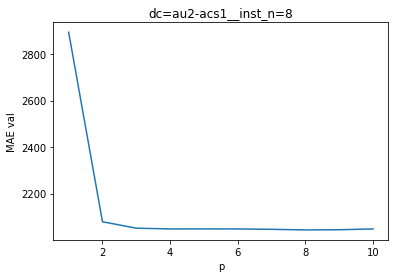

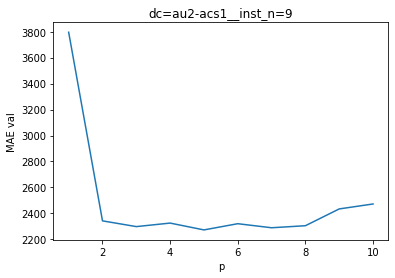

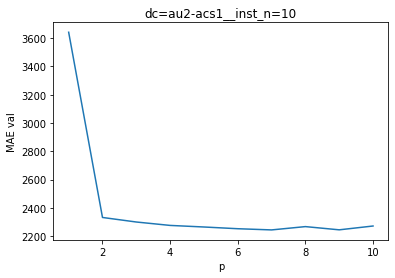

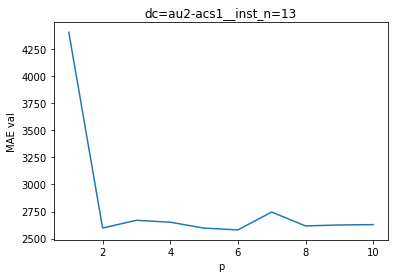

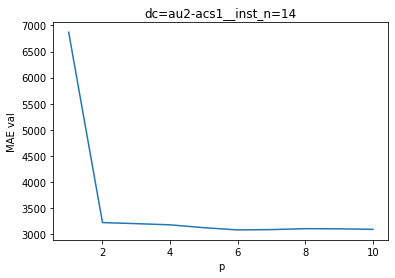

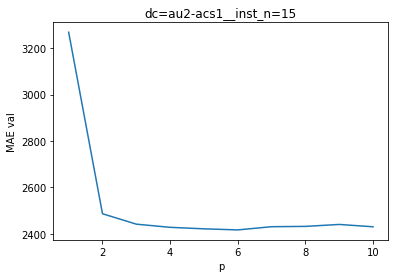

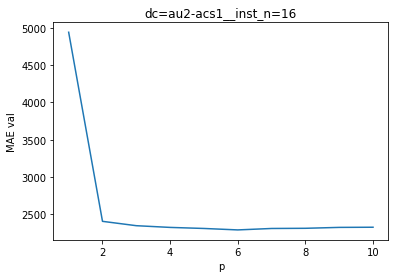

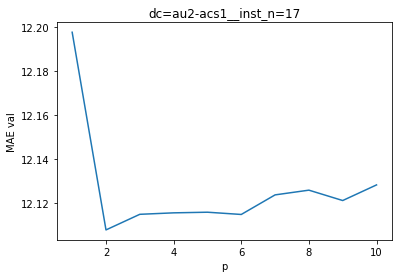

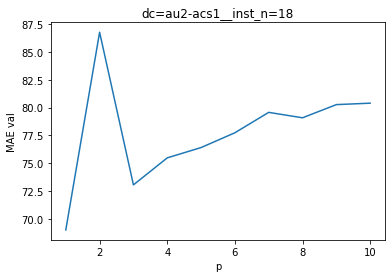

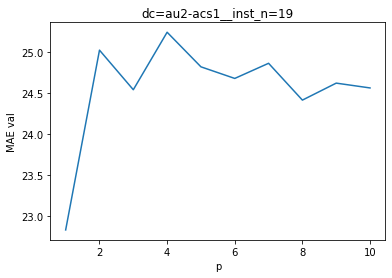

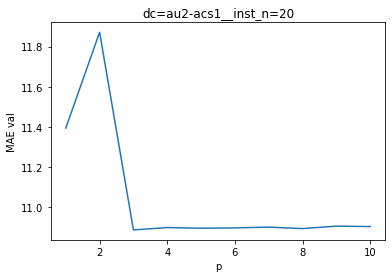

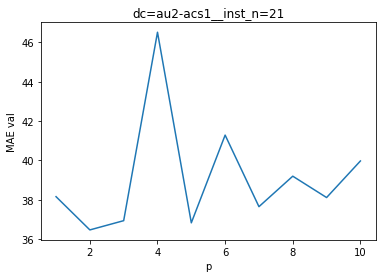

dc=eu3-acs1


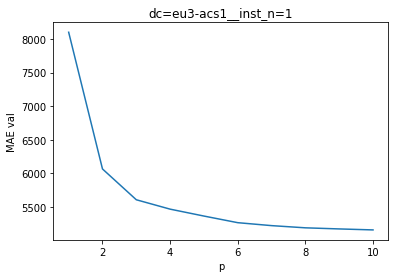

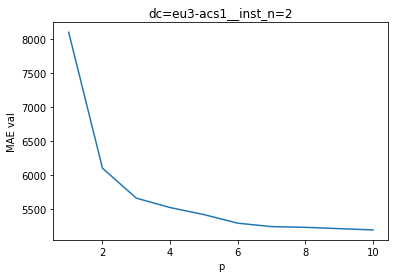

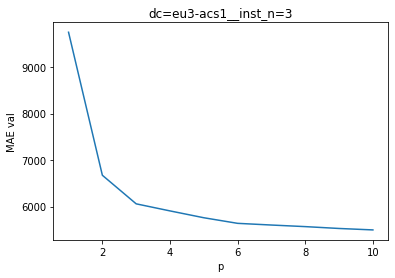

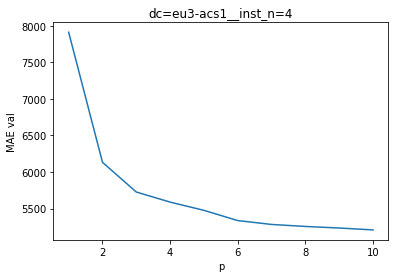

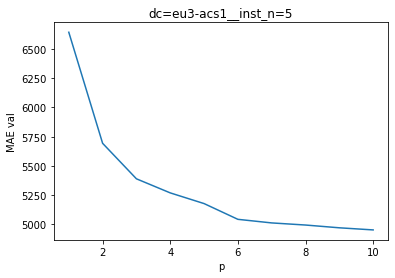

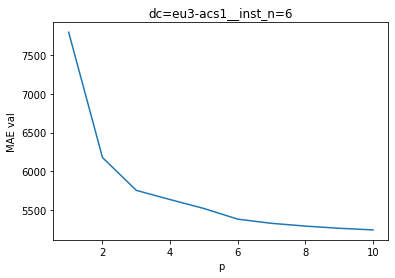

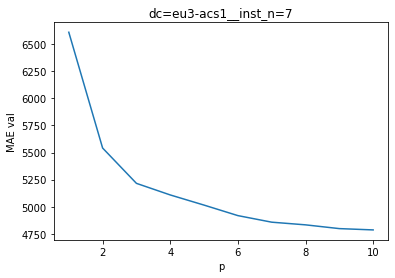

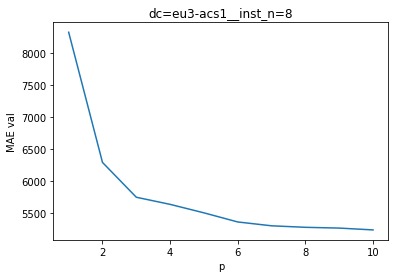

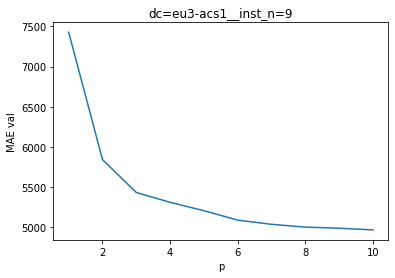

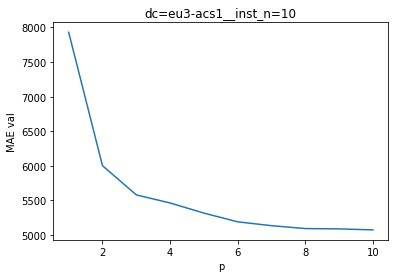

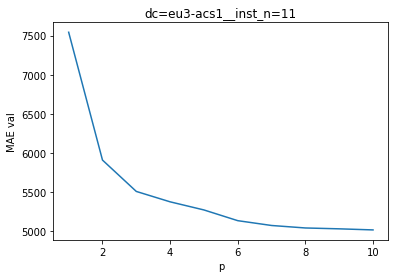

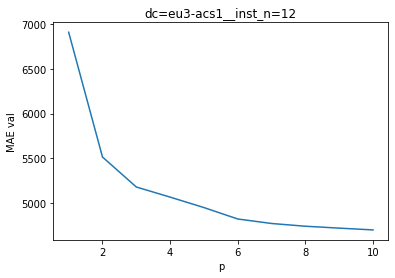

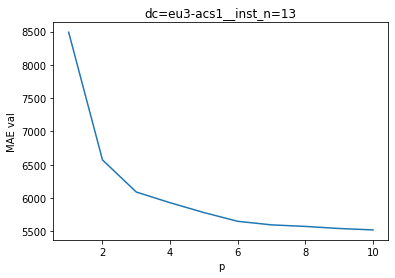

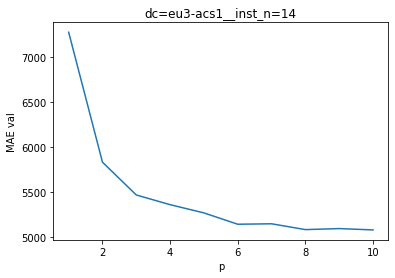

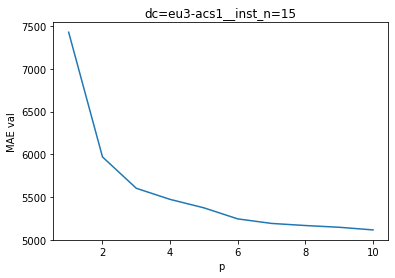

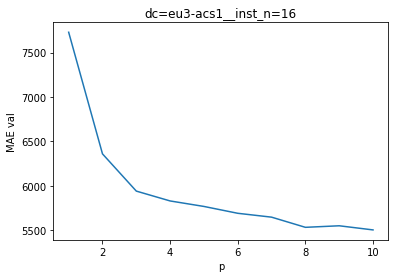

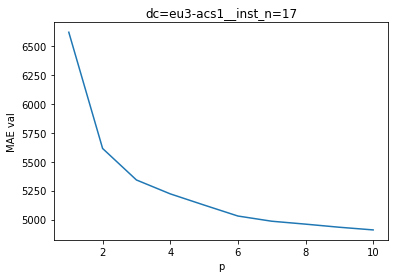

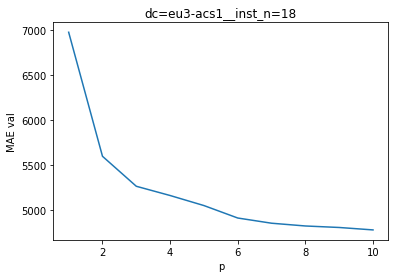

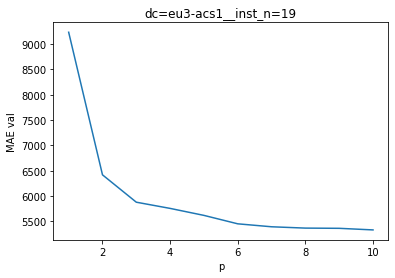

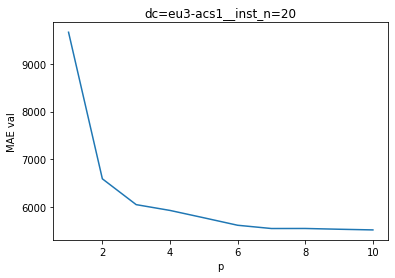

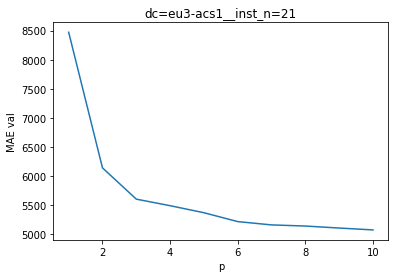

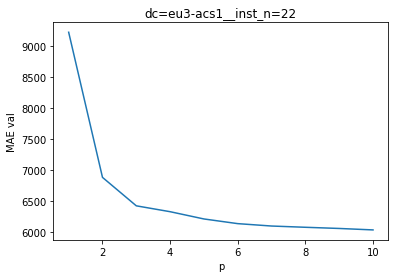

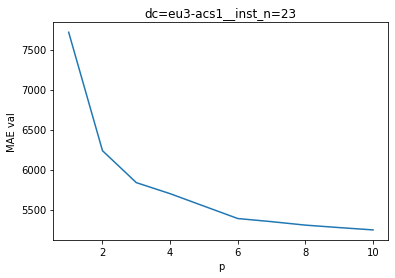

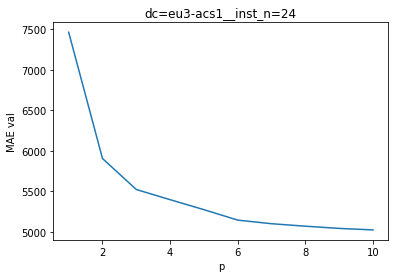

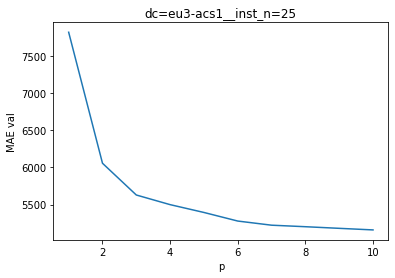

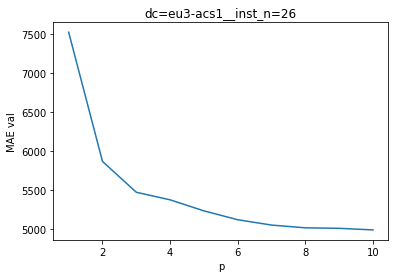

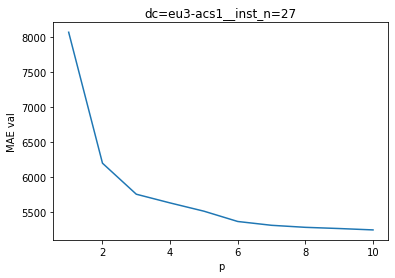

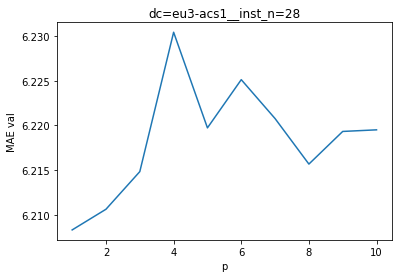

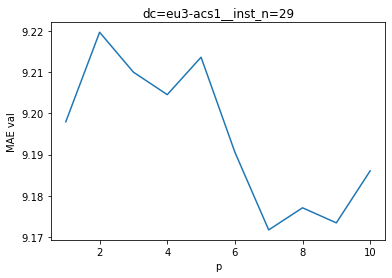

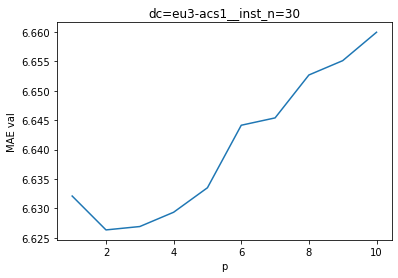

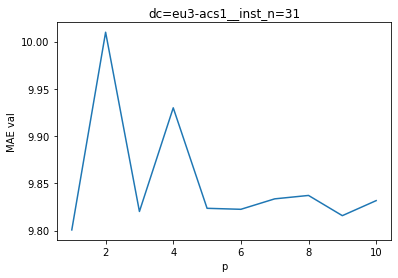

dc=us3


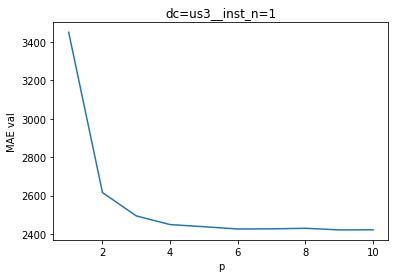

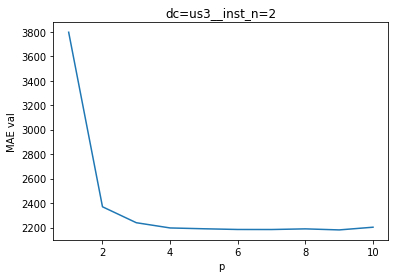

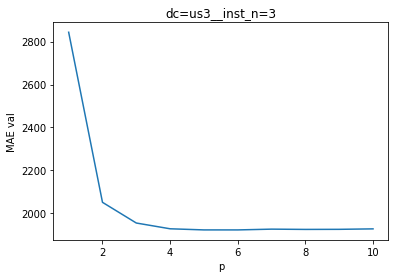

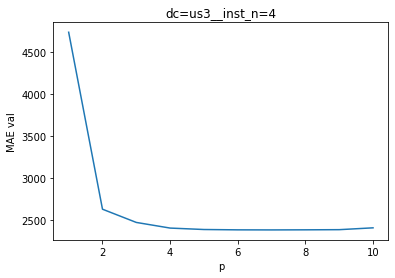

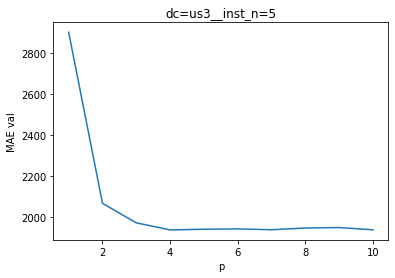

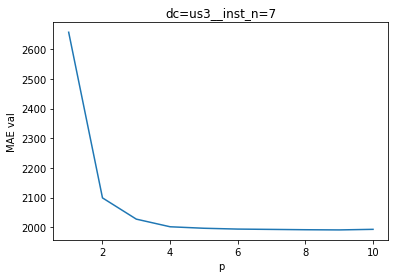

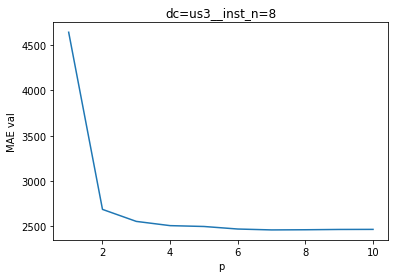

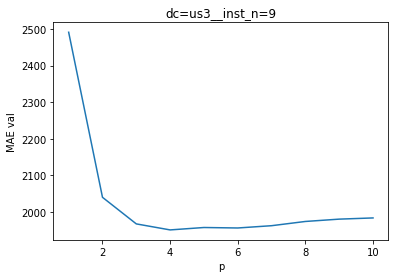

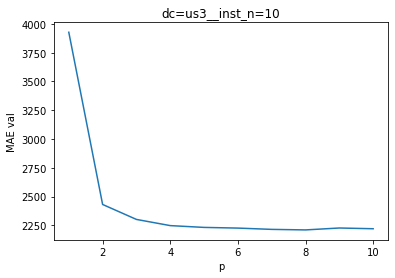

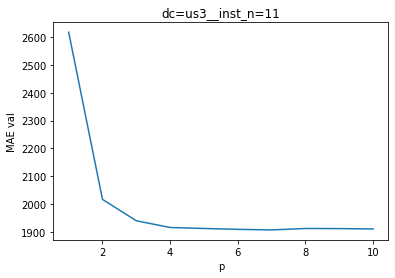

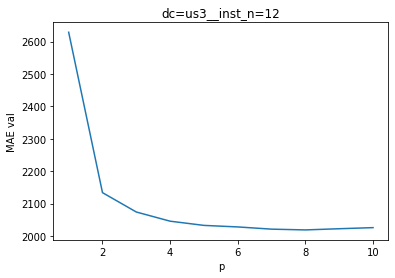

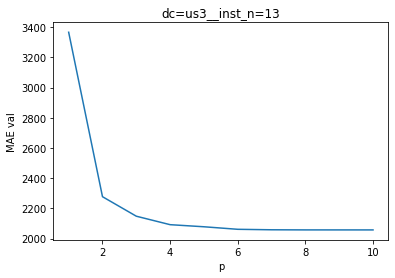

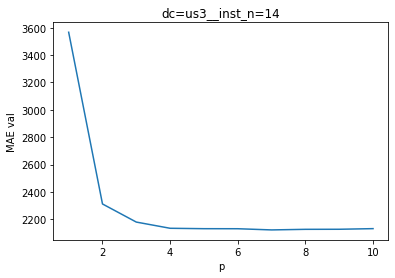

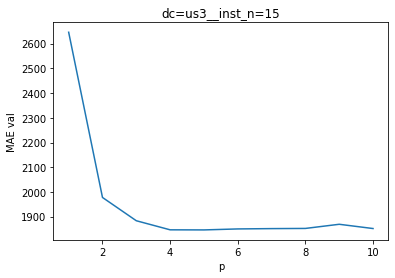

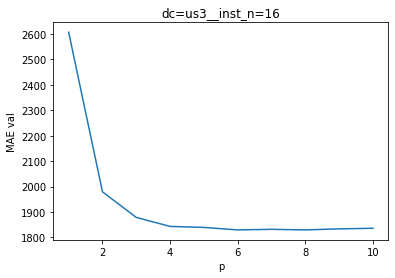

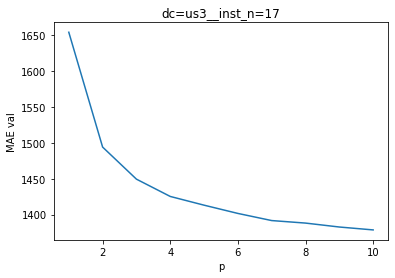

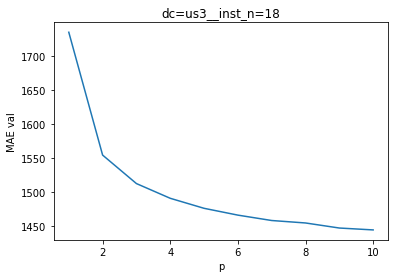

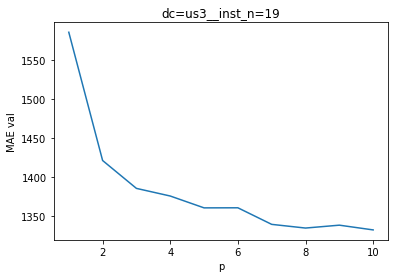

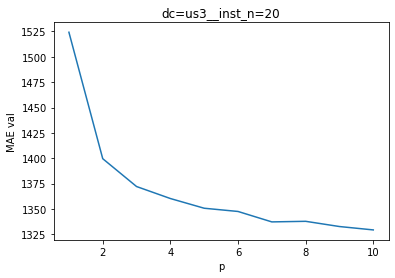

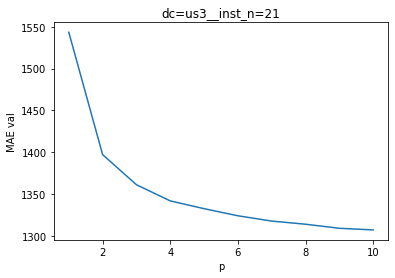

In [15]:
#'''
dots = np.linspace(1, 10, num=10, dtype=int)

train_size = 60 * 24 * 7
test_size = 60 * 24 * 7 * 2
dots_data = pd.DataFrame()
for dc in dc_period:
    print(f'dc={dc}')
    for _i, inst_n in enumerate(sorted(conf.get_inst_range_for_dc(dc))):

        if f'dc={dc}__inst_n={inst_n}' not in list(dots_data.columns.values):
            print(f'\tinst = {_i+1} / {len(conf.get_inst_range_for_dc(dc))}', end = '\r')
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            # data['date'] = data['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))
            maes = []
            for d in dots:
                predictor = model.ModelLA(dots=d, imp_features=6)
                maes.append(metrics.get_validation_score(model=predictor, data=data, error_func=MAE,
                                                         train_size=train_size, test_size=test_size, n=4)
                           )
            dots_data[f'dc={dc}__inst_n={inst_n}'] = maes
            dots_data.to_csv('../datasets/Aleksander/dots_data_1.csv')
        
        plt.plot(dots, dots_data[f'dc={dc}__inst_n={inst_n}'])
        plt.title(f'dc={dc}__inst_n={inst_n}')
        plt.xlabel('p')
        plt.ylabel('MAE val')
        plt.show()
#'''

# BIC


In [14]:
def log_like_hood_f(y, sigma=None, mu=None):
    if mu is None:
        mu = y.mean()
    if sigma is None:
        sigma = np.sum((y - mu) ** 2)
    n = len(y)
    out = - n * np.log(sigma) - n / 2 * np.log(2 * np.pi)
    out -= 0.5 * sigma * np.sum(y - mu)
    return out       

In [15]:
def Bayes_inf_crit(y, k, sigma=None, mu=None):
    n = len(y)
    out = k * np.log(n) - 2 * log_like_hood_f(y, sigma, mu)
    return out

In [21]:
all_the_num_metrics_df = None
var_df = pd.read_csv('../datasets/Aleksander/variance_of_feature_coeffs.csv')
mask = [la_utils.is_real_feature(x) for x in var_df['feature'].to_list()]
real_features = list(itertools.compress(var_df['feature'].to_list(), mask))

dcs_n = len(list(dc_period.keys()))
inst_max_n = 0
for dc in dc_period:
    inst_max_n = max(inst_max_n, max(conf.get_inst_range_for_dc(dc)))

for nf in np.linspace(start=2, stop=len(real_features),
                      num=(len(real_features) - 1-  2),
                      dtype=int
                     ):
    print(f'Number of important metrics = {nf-1}')
    important_features = real_features[1:nf]
    # df for only current num of metrics
    for_curr_num_of_m = pd.DataFrame(np.zeros((dcs_n, inst_max_n)),
                                     index = list(dc_period.keys()),
                                     columns = [f'{nf-1}_metrics__{_i}' for _i in range(1,inst_max_n+1)]
                                    )
    for dc in dc_period:
        print(f'dc={dc}')
        not_all_m_sc = {}
        for _i, inst_n in enumerate(conf.get_inst_range_for_dc(dc)):
            print(f'\tinst {_i} / {len(conf.get_inst_range_for_dc(dc))}', end='\r')
            # load data and rename columns
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            data = la_prepro.fill_misses(data)
            train_data = data[:24 * 3 * 60]
            
            #Then let's train 2 models with important features and not
            predictor = model.ModelLA(imp_features=important_features)
            predictor.fit(train_data)
            out = predictor.predict(train_data)       
            out.dropna(inplace=True)
            y_train_hat_ = out['predictions_sc'].values.reshape((-1, 1))
            y_train_hat_ = predictor.scaler_y.inverse_transform(y_train_hat_).reshape(-1)
            
            y_train_ = out['target_der_sc'].values.reshape((-1, 1))
            y_train_ = predictor.scaler_y.inverse_transform(y_train_).reshape(-1)
            
            bic = BIC(error=y_train_ - y_train_hat_, k=len(predictor.features),
                      sigma=None, mu=None
                     )
            
            not_all_m_sc[f'{nf-1}_metrics__{inst_n}'] = bic
        for_curr_num_of_m.loc[dc] = not_all_m_sc
    if all_the_num_metrics_df is not None:
        all_the_num_metrics_df = pd.concat([all_the_num_metrics_df, for_curr_num_of_m], axis=1)
    else:
        all_the_num_metrics_df = for_curr_num_of_m

    # ok, here are improvement for scores

all_the_num_metrics_df.to_csv(f'../datasets/Aleksander/bic_drop_metrics.csv')

Number of important metrics = 1
dc=au2-acs1
dc=us6-acs219
dc=eu3-acs130
dc=us330 / 31
Number of important metrics = 2
dc=au2-acs1
dc=us6-acs219
dc=eu3-acs130
dc=us330 / 31
Number of important metrics = 3
dc=au2-acs1
dc=us6-acs219
dc=eu3-acs130
dc=us330 / 31
Number of important metrics = 4
dc=au2-acs1


KeyboardInterrupt: 

In [ ]:
all_the_num_metrics_df = None
var_df = pd.read_csv('../datasets/Aleksander/variance_of_feature_coeffs.csv')
mask = [la_utils.is_real_feature(x) for x in var_df['feature'].to_list()]
real_features = list(itertools.compress(var_df['feature'].to_list(), mask))

dcs_n = len(list(dc_period.keys()))
inst_max_n = 0
for dc in dc_period:
    inst_max_n = max(inst_max_n, max(conf.get_inst_range_for_dc(dc)))

for nf in np.linspace(start=2, stop=len(real_features),
                      num=(len(real_features) - 1-  2),
                      dtype=int
                     ):
    print(f'Number of important metrics = {nf-1}')
    important_features = real_features[1:nf]
    # df for only current num of metrics
    for_curr_num_of_m = pd.DataFrame(np.zeros((dcs_n, inst_max_n)),
                                     index = list(dc_period.keys()),
                                     columns = [f'{nf-1}_metrics__{_i}' for _i in range(1,inst_max_n+1)]
                                    )
    for dc in dc_period:
        print(f'dc={dc}')
        not_all_m_sc = {}
        for _i, inst_n in enumerate(conf.get_inst_range_for_dc(dc)):
            print(f'\tinst {_i} / {len(conf.get_inst_range_for_dc(dc))}', end='\r')
            # load data and rename columns
            data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
            data = la_prepro.fill_misses(data)
            train_data = data[:24 * 3 * 60]
            
            #Then let's train 2 models with important features and not
            predictor = model.ModelLA(imp_features=important_features)
            predictor.fit(train_data)
            out = predictor.predict(train_data)       
            out.dropna(inplace=True)
            y_train_hat_ = out['predictions_sc'].values.reshape((-1, 1))
            y_train_hat_ = predictor.scaler_y.inverse_transform(y_train_hat_).reshape(-1)
            
            y_train_ = out['target_der_sc'].values.reshape((-1, 1))
            y_train_ = predictor.scaler_y.inverse_transform(y_train_).reshape(-1)
            
            bic = AIC(error=y_train_ - y_train_hat_, k=len(predictor.features),
                      sigma=None, mu=None
                     )
            
            not_all_m_sc[f'{nf-1}_metrics__{inst_n}'] = bic
        for_curr_num_of_m.loc[dc] = not_all_m_sc
    if all_the_num_metrics_df is not None:
        all_the_num_metrics_df = pd.concat([all_the_num_metrics_df, for_curr_num_of_m], axis=1)
    else:
        all_the_num_metrics_df = for_curr_num_of_m

    # ok, here are improvement for scores

all_the_num_metrics_df.to_csv(f'../datasets/Aleksander/aic_drop_metrics.csv')

# Тут речь про более интересную сезонность

In [ ]:
week_end_gap = 60 * 24 * 7 * 2
dc = 'us6-acs2'
inst_n = 2
data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
data = la_prepro.fill_misses(data)
data = data[week_end_gap:]
seas_st = 60 * 24 * 6
seas_end = 60 * 24 * 8
lags = np.linspace(seas_st, seas_end, num=(seas_end - seas_st - 1), dtype=int)
test_size = seas_end + 60 * 24 * 4
train_size = seas_end + 60 * 24 * 4
save_freq = 25
n_val = 4

In [ ]:
'''
maes = []
for _i, lag in enumerate(lags):
    if _i % save_freq == 1:
        _d = pd.DataFrame()
        _d['maes'] = maes
        _d['lags'] = lags[:_i]
        _d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=15.csv', index=False)
    print(f'\tinst = {_i+1} / {len(lags)}', end = '\r')
    seasonal = seasonal={'lags': [lag], 'avg': 15}
    predictor = model.ModelLA(seasonal=seasonal)
    maes.append(metrics.get_validation_score(model=predictor, data=data, train_size=train_size, 
                                             test_size=test_size, seasonal=seasonal,
                                             error_func=MAE, n=n_val
                                            )
               )
_d = pd.DataFrame()
_d['maes'] = maes
_d['lags'] = lags
_d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=15.csv', index=False)
'''

In [ ]:
'''
maes = []
for _i, lag in enumerate(lags):
    if _i % save_freq == 1:
        _d = pd.DataFrame()
        _d['maes'] = maes
        _d['lags'] = lags[:_i]
        _d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=5.csv', index=False)
    print(f'\tinst = {_i+1} / {len(lags)}', end = '\r')
    seasonal = {'lags': [lag], 'avg': 5}
    predictor = model.ModelLA(seasonal=seasonal)
    maes.append(metrics.get_validation_score(model=predictor, data=data, train_size=train_size,
                                             test_size=test_size, seasonal=seasonal,
                                             error_func=MAE, n=n_val
                                            )
               )
_d = pd.DataFrame()
_d['maes'] = maes
_d['lags'] = lags
_d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=5.csv')
'''

In [ ]:
'''
maes = []
for _i, lag in enumerate(lags):
    if _i % save_freq == 1:
        _d = pd.DataFrame()
        _d['maes'] = maes
        _d['lags'] = lags[:_i]
        _d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=1.csv', index=False)
    print(f'\tinst = {_i+1} / {len(lags)}', end = '\r')
    seasonal = {'lags': [lag], 'avg': 1}
    predictor = model.ModelLA(seasonal=seasonal)
    maes.append(metrics.get_validation_score(model=predictor, data=data, train_size=train_size,
                                             test_size=test_size, seasonal=seasonal,
                                             error_func=MAE, n=n_val
                                            )
               )
    
_d = pd.DataFrame()
_d['maes'] = maes
_d['lags'] = lags
_d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=1.csv')
'''

# А теперь тоже самое но для негладкой сезонности

In [ ]:
dc = 'us6-acs2'
inst_n = 23
data = pd.read_csv(load_model_data(dc, inst_n, dc_period[dc][0], dc_period[dc][1], pri=False))
data = la_prepro.fill_misses(data)
data = data[week_end_gap:]

In [ ]:
'''
maes = []
for _i, lag in enumerate(lags):
    if _i % save_freq == 1:
        _d = pd.DataFrame()
        _d['maes'] = maes
        _d['lags'] = lags[:_i]
        _d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=15_for_not_smoth.csv', index=False)
    print(f'\tinst = {_i+1} / {len(lags)}', end = '\r')
    predictor = model.ModelLA(seasonal=seasonal)
    seasonal = {'lags': [lag], 'avg': 15}
    maes.append(metrics.get_validation_score(model=predictor, data=data, train_size=train_size,
                                             test_size=test_size, seasonal=seasonal,
                                             error_func=MAE, n=n_val
                                            )
               )
_d = pd.DataFrame()
_d['maes'] = maes
_d['lags'] = lags
_d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=15_for_not_smoth.csv')
''' 

In [ ]:
'''
maes = []
for _i, lag in enumerate(lags):    
    if _i % save_freq == 1:
        _d = pd.DataFrame()
        _d['maes'] = maes
        _d['lags'] = lags[:_i]
        _d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=5_for_not_smoth.csv', index=False)
    print(f'\tinst = {_i+1} / {len(lags)}', end = '\r')
    seasonal = {'lags': [lag], 'avg': 5}
    predictor = model.ModelLA(seasonal=seasonal)
    maes.append(metrics.get_validation_score(model=predictor, data=data, train_size=train_size,
                                             test_size=test_size, seasonal=seasonal,
                                             error_func=MAE, n=n_val
                                            )
               )
_d = pd.DataFrame()
_d['maes'] = maes
_d['lags'] = lags
_d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=5_for_not_smoth.csv')
'''

In [ ]:
'''
maes = []
for _i, lag in enumerate(lags):    
    if _i % save_freq == 1:
        _d = pd.DataFrame()
        _d['maes'] = maes
        _d['lags'] = lags[:_i]
        _d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=1_for_not_smoth.csv', index=False)
    print(f'\tinst = {_i+1} / {len(lags)}', end = '\r')
    seasonal = {'lags': [lag], 'avg': 1}
    predictor = model.ModelLA(seasonal=seasonal)
    maes.append(metrics.get_validation_score(model=predictor, data=data, train_size=train_size,
                                             test_size=test_size, seasonal=seasonal,
                                             error_func=MAE, n=n_val
                                            )
               )
    
_d = pd.DataFrame()
_d['maes'] = maes
_d['lags'] = lags
_d.to_csv('../datasets/Aleksander/!lots_of_lag_avg=1_for_not_smoth.csv')
'''